<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مشارکت در کلاس
</font>
</h1>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین نرخ مشارکت دانشجویان یک دوره‌ی آموزشی آنلاین در قالب یک فایل csv به شما داده شده است.
نرخ مشارکت بیانگر نسبت مدت زمان تماشای ویدئوی آموزشی توسط هر دانشجو به کل مدت زمان آموزش است.
نخست داده‌ها را از فایل 
<code>Engagement_ratio.csv</code>
بخوانید و در متغیر <code>data</code> بریزید.
</font>
</p>

In [77]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import random
import seaborn as sns

In [52]:
data = np.genfromtxt('Engagement ratio.csv', delimiter=',')
print(data)

[0.00014921 0.03204704 0.07161051 ... 0.12606084 0.09834898 0.00127969]


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
میانگین و انحراف از میانگین این جمعیت را حساب کنید.
</font>
</p>

In [53]:
mean_pop = np.mean(data)
std_pop = np.std(data)
print('population mean:' , mean_pop)
print('population std:', std_pop)

population mean: 0.07726584465256987
population std: 0.10720956480669144


In [54]:
def get_mean(data):
    mean_pop = np.mean(data)
    return mean_pop

In [55]:
def get_std(data):
    std_pop = np.std(data)
    return std_pop

In [7]:
data_mean = get_mean(data)
data_std = get_std(data)

In [56]:
print(data_mean, data_std)

0.07726584465256987 0.10720956480669144




<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون ۱۰۰۰ مرتبه نمونه‌گیری به اندازه‌ی ۳۰ عدد از جمعیت بگیرید و به سوالاتی که در ادامه پرسیده می‌شود پاسخ دهید. 
</font>
</p>

In [90]:
def get_sets_of_samples(data,num_sets=1000,sample_size=30,seed=111):
    random.seed(seed)
    sets_of_samples=[]
    population = data.tolist() if isinstance(data, np.ndarray) else data
    for _ in range(num_sets):
        sample=random.sample(population, sample_size)
        sets_of_samples.append(sample)
    return sets_of_samples

In [79]:
sets_of_samples=get_sets_of_samples(data,num_sets=1000,sample_size=30,seed=111)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
میانگین و انحراف از معیار هر ست از نمونه‌ها را محاسبه کرده و در متغیر‌های
<code>mean_sample_set</code>
و
<code>std_sample_set</code>
توسط توابع<code>get_mean_sample_set</code> و <code>get_std_sample_set</code> بازگردانید تا در محاسبات آتی استفاده شوند.
</font>
</p>

In [91]:
def get_mean_sample_set(sets_of_samples):
    mean_sample_set = []
    for i in range(len(sets_of_samples)):
        x=np.mean(sets_of_samples[i])
        mean_sample_set.append(x)
    return mean_sample_set

In [92]:
def get_std_sample_set(sets_of_samples):
    std_sample_set = []
    for i in range(len(sets_of_samples)):
        y=np.std(sets_of_samples[i])
        std_sample_set.append(y)
    return std_sample_set

In [93]:
mean_sample_set=get_mean_sample_set(sets_of_samples)

In [94]:
std_sample_set=get_std_sample_set(sets_of_samples)

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
 هیستوگرام توزیع نمونه‌‌ها در ۱۰ نمونه‌برداری اول را در قالب ۱۰ تصویر رسم نمایید. 

</font>
</p>

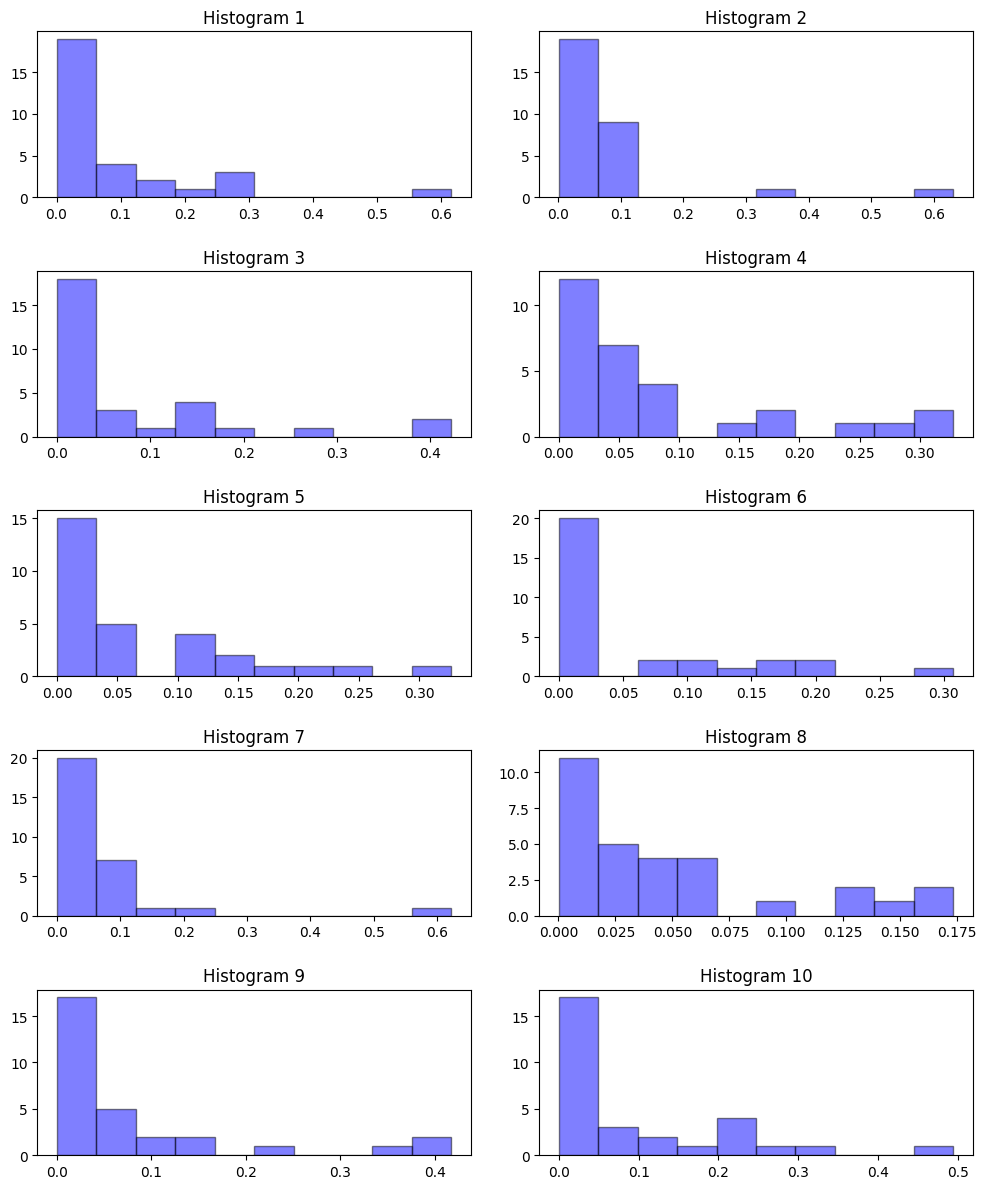

In [96]:
# for i in range(10):
#     plt.figure(i)  
#     plt.hist(sets_of_samples[i])
#     plt.show() 


fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))
for i in range(10):
    row = i // 2
    col = i % 2
    axes[row, col].hist(sets_of_samples[i], color='blue', alpha=0.5,edgecolor='black')
    axes[row, col].set_title(f'Histogram {i+1}')
plt.tight_layout(h_pad=2,w_pad=2)
plt.show()


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون هیستوگرام توزیع میانگین تمامی ۱۰۰۰ نمونه‌برداری‌ را در یک تصویر رسم نمایید. آیا تصویر به‌دست آمده قابل پیش‌بینی بود؟
</font>
</p>

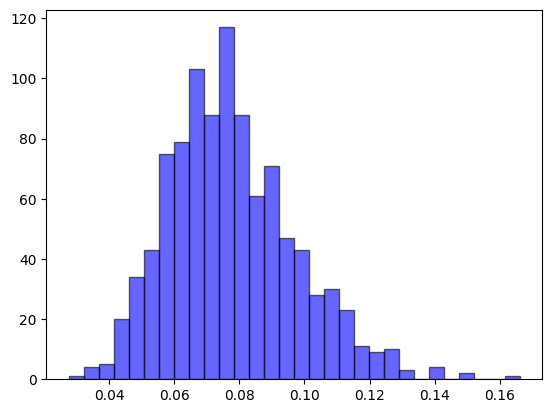

In [99]:
plt.hist(mean_sample_set, bins=30, alpha=0.6, color='blue',edgecolor='black')
plt.show()



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تقریبا ۹۵ درصد میانگین نمونه‌ها در چه بازه‌ای قرار می‌گیرد؟ (توجه: این تقریب را بر اساس نرمال فرض کردن توزیع این نمونه‌ها درنظر می‌گیریم.)</font>
</p>

In [105]:
from scipy.stats import norm

In [106]:
def get_95_bounds(mean_sample_set):
    mean = np.mean(mean_sample_set)
    std_dev = np.std(mean_sample_set)
    lower_bound, upper_bound = norm.interval(0.95, loc=mean, scale=std_dev)
    return lower_bound,upper_bound

In [107]:
lower_b = get_95_bounds(get_mean_sample_set(get_sets_of_samples(data)))[0]
upper_b = get_95_bounds(get_mean_sample_set(get_sets_of_samples(data)))[1]
print(lower_b, upper_b)

0.03919540862952138 0.11614335618879597



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بازه‌ی اطمینان ۹۵ درصد در قسمت قبل را با استفاده از z-table محاسبه کنید.
</font>
</p>


In [114]:
def get_95_ci():
    z_score = stats.norm.ppf(0.975)
    mean_sample=np.mean(mean_sample_set)
    std_of_means =np.std(mean_sample_set)
    lower_bound = mean_sample - z_score * std_of_means
    upper_bound = mean_sample+ z_score * std_of_means 
    return lower_bound,upper_bound

In [115]:
lower_b_ci = get_95_ci()[0]
upper_b_ci = get_95_ci()[1]

In [116]:
print(lower_b_ci,upper_b_ci)

0.03919540862952138 0.11614335618879597


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای هر ۱۰۰۰ نمونه‌گیری صورت گرفته در بالا(بخش اول)، بازه‌ی اطمینان ۹۵ درصد را حساب کنید. درصد تعداد نمونه‌هایی که میانگین جمعیت در بازه‌ی اطمینان ۹۵ درصد آن‌ها(نمونه‌ها) در بازه‌ی بدست آمده بوده‌اند را گزارش کنید.
</font>
</p>


In [117]:
sample_bounds=[]
c=0
se=data_std/np.sqrt(30)
me=stats.norm.ppf(0.975)*se

for sample in sets_of_samples:
    sample_mean = np.mean(sample)
    upperb=sample_mean+me
    lowerb=sample_mean-me
    sample_bounds.append((lowerb,upperb))

for interval in sample_bounds:
    if interval[0] <= data_mean <= interval[1]:   
        c=c+1
 
proportion = (c / 1000)*100
print(proportion)

95.6


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تمامی خواسته‌های بخش اول را این بار با نمونه‌هایی با اندازه ۲۰۰ سمپل تکرار کنید و نتایج را مقایسه کنید.
</font>
</p>

In [118]:
sets_of_samples_200=get_sets_of_samples(data,num_sets=1000,sample_size=200,seed=111)

In [119]:
mean_sample_set_200=get_mean_sample_set(sets_of_samples_200)

In [120]:
std_sample_set_200=get_std_sample_set(sets_of_samples_200)

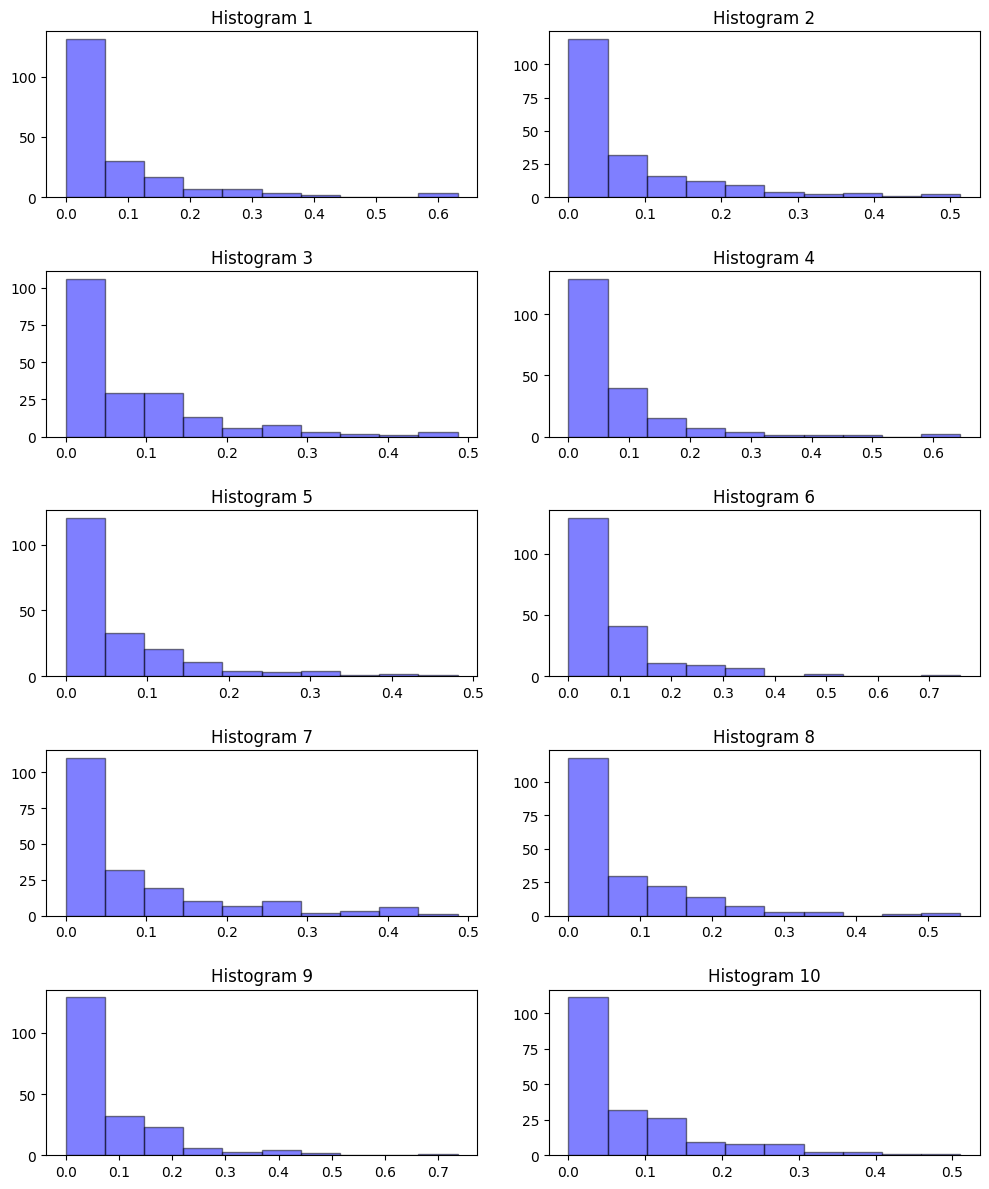

In [121]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))
for i in range(10):
    row = i // 2
    col = i % 2
    axes[row, col].hist(sets_of_samples_200[i], color='blue', alpha=0.5,edgecolor='black')
    axes[row, col].set_title(f'Histogram {i+1}')
plt.tight_layout(h_pad=2,w_pad=2)
plt.show()


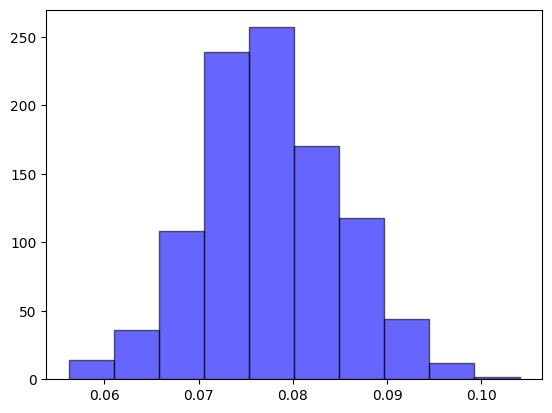

In [123]:
plt.hist(mean_sample_set_200, alpha=0.6, color='blue',edgecolor='black')
plt.show()

In [124]:
lower_b_200 = get_95_bounds(get_mean_sample_set(sets_of_samples_200))[0]
upper_b_200 = get_95_bounds(get_mean_sample_set(sets_of_samples_200))[1]

In [125]:
print(lower_b_200,upper_b_200)

0.06310261062054781 0.09211101466421265


In [126]:
def get_95_ci_200():
    z_score = stats.norm.ppf(0.975)
    mean_sample=np.mean(mean_sample_set_200)
    std_of_means =np.std(mean_sample_set_200)
    lower_bound = mean_sample - z_score * std_of_means
    upper_bound = mean_sample+ z_score * std_of_means 
    return lower_bound,upper_bound

In [127]:
lower_b_ci_200= get_95_ci_200()[0]
upper_b_ci = get_95_ci_200()[1]

In [128]:
print(lower_b_200,upper_b_200)

0.06310261062054781 0.09211101466421265


In [132]:
sample_bounds=[]
c=0

for sample in sets_of_samples_200:
    sample_mean = np.mean(sample)
    sample_std_dev = np.std(sample)
    sample_cl95_interval = norm.interval(0.95, loc=sample_mean, scale=sample_std_dev)
    sample_bounds.append(sample_cl95_interval)

for interval in sample_bounds:
    if interval[0] <= data_mean <= interval[1]:   
        c=c+1
        
proportion = (c / len(sample_bounds))*100
print(proportion)

100.0


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش سوم
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
درس جدیدی آماده کرده‌ایم که شامل ۶۰ دقیقه ویدیو است. می‌خواهیم این درس را در دوره‌ی آموزشی دانشجویان بگنجانیم. اما در این درس تغییر استراتژی داده‌ایم و می‌خواهیم ببینیم این تغییر نرخ مشارکت را بیشتر می‌کند یا نه. 
به ۲۰ دانشجو آن را عرضه کرده‌ایم و میانگین نرخ مشارکت آن‌ها ۰.۱۳ بود. 
اگر بخواهیم این درس را برای همه دانشجویان این جمعیت آماده کنیم، برآورد نقطه‌ای و بازه‌ای شما برای نرخ مشارکت دانشجویان بر اساس نمونه‌ای با اندازه‌ی ۲۰ چقدر است؟ پاسخ شما باید برای حداقل ۹۸ درصد جمعیت معتبر باشد.
</font>
</p>

In [135]:
def get_98_ci():
    sample_size=20
    sample_mean=0.13
    se=data_std/np.sqrt(sample_size)
    alpha=0.02
    # lower_bound = 0.13 - z_score * std_of_means
    # upper_bound = 0.13+ z_score * std_of_means 
    lower_bound,upper_bound=stats.t.interval(1-alpha, df=sample_size - 1, loc=sample_mean, scale=se)

    return lower_bound,upper_bound

In [136]:
lower_bound_98 = get_98_ci()[0]
upper_bound_98 = get_98_ci()[1]

In [137]:
print(lower_bound_98, upper_bound_98)

0.06912150917591024 0.19087849082408975



<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
با توجه به این بررسی‌ها، آیا می‌توانیم ادعا کنیم که تغییر استراتژی ما در ارایه این درس، نرخ مشارکت را بیشتر می‌کند؟

</font>
</p>

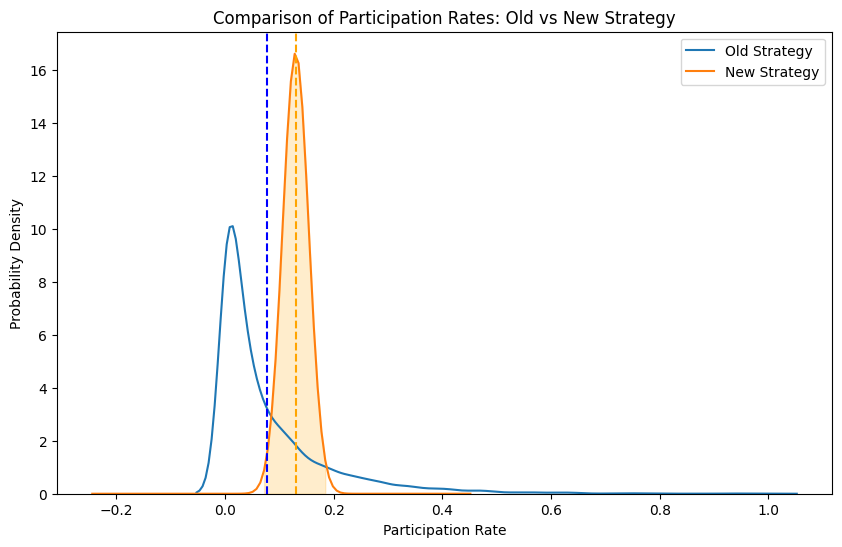

In [139]:
old_mean = data_mean
new_mean = 0.13
std_dev = data_std
sample_size = 20
std_err = std_dev / np.sqrt(sample_size)
conf_int = get_98_ci()


x = np.linspace(old_mean - 3*std_dev, new_mean + 3*std_dev, 100)

pdf_new = stats.norm.pdf(x, new_mean, std_err)


plt.figure(figsize=(10, 6))

sns.kdeplot(data,label='Old Strategy')
plt.plot(x, pdf_new, label='New Strategy')

plt.axvline(old_mean, color='blue', linestyle='--')
plt.axvline(new_mean, color='orange', linestyle='--')

plt.fill_between(x, pdf_new, where=(x >= conf_int[0]) & (x <= conf_int[1]), color='orange', alpha=0.2)

plt.legend()
plt.xlabel('Participation Rate')
plt.ylabel('Probability Density')
plt.title('Comparison of Participation Rates: Old vs New Strategy')
plt.show()



   بر اساس برآورد نقطه‌ای (یعنی همان میانگین نمونه که ۰.۱۳ است و از میانگین جمعیت قبل از تغییر استراتژی بیشتر است) در نگاه اول به نظر می‌رسد که استراتژی جدید باعث افزایش نرخ مشارکت در جمعیت خواهد شد.
اما بازه اطمینان ۹۸ درصدی که محاسبه کرده‌ایم بین ۰.۰۶۹ و ۰.۱۹۰ است. بر اساس این محاسبه می‌توان با ۹۸ درصد اطمینان گفت که میانگین نرخ مشارکت کل جمعیت در صورت اضافه کردن درس جدید جایی در این بازه خواهد بود. 
در حال حاضر از آنجایی که میانگین قدیمی یعنی قبل از تغییر استراتژی (۰.۰۷۷) در همین بازه قرار می‌گیرد نمی‌توانیم با اطمینان ادعا کنیم که تغییر استراتژی موجب تغییر اساسی در میانگین نرخ مشارکت جمعیت می‌شود. البته باید توجه کرد که میانگین قدیم در اوایل این بازه قرار گرفته‌است، پس می‌توان به مقداری تغییر امیدوار بود. 
در تصویرسازی زیر یک توزیع نرمال بر اساس نمونه‌ای با مشخصات داده‌شده شبیه‌سازی شده و با توزیع داده‌های قبلی جمعیت مقایسه شده‌است. در تصویر میتوان دید که دو توزیع اشتراک قابل توجهی دارند و میانگین داده‌های قبلی در بازه ۹۸ درصد که رنگی شده‌است قرار گرفته است.  


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    برای ساخته‌شدن فایل <code>result.zip</code> سلول‌های زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به پشتیبانی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [140]:
result = {'get_mean': data_mean, 'get_std': data_std, 'lower_b': lower_b,
         'upper_b': upper_b, 'lower_b_ci': lower_b_ci, 'upper_b_ci': upper_b_ci,
          'lower_bound_98' : lower_bound_98, 'upper_bound_98': upper_bound_98 
                               }

In [141]:
result = pd.DataFrame(result, index=[0])
result.to_csv('solve.csv')

In [142]:
import zlib
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["solve.csv", "class_participation.ipynb"]
compress(file_names)

File Paths:
['solve.csv', 'class_participation.ipynb']
